<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-анализ-данных" data-toc-modified-id="Загрузка-и-анализ-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и анализ данных</a></span></li><li><span><a href="#Модели-трекинга" data-toc-modified-id="Модели-трекинга-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Модели трекинга</a></span><ul class="toc-item"><li><span><a href="#Базовая-модель-BoT-SORT" data-toc-modified-id="Базовая-модель-BoT-SORT-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Базовая модель BoT-SORT</a></span><ul class="toc-item"><li><span><a href="#Расчёт-треков" data-toc-modified-id="Расчёт-треков-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Расчёт треков</a></span></li><li><span><a href="#Метрика" data-toc-modified-id="Метрика-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Метрика</a></span></li></ul></li><li><span><a href="#Модель-ByteTrack" data-toc-modified-id="Модель-ByteTrack-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Модель ByteTrack</a></span><ul class="toc-item"><li><span><a href="#Метрика" data-toc-modified-id="Метрика-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Метрика</a></span></li></ul></li></ul></li><li><span><a href="#Анализ-результатов" data-toc-modified-id="Анализ-результатов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ результатов</a></span><ul class="toc-item"><li><span><a href="#Сводная-таблица-по-результатам" data-toc-modified-id="Сводная-таблица-по-результатам-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Сводная таблица по результатам</a></span></li><li><span><a href="#Базовая-модель" data-toc-modified-id="Базовая-модель-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Базовая модель</a></span></li><li><span><a href="#Модель-bytetrack" data-toc-modified-id="Модель-bytetrack-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Модель bytetrack</a></span></li></ul></li><li><span><a href="#Визуальный-анализ-треков-обектов" data-toc-modified-id="Визуальный-анализ-треков-обектов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Визуальный анализ треков обектов</a></span></li><li><span><a href="#Подбор-границ-трекинга-объектов" data-toc-modified-id="Подбор-границ-трекинга-объектов-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Подбор границ трекинга объектов</a></span></li><li><span><a href="#Приложение-1-(Дополнительная-демонстрация-работы-модели)" data-toc-modified-id="Приложение-1-(Дополнительная-демонстрация-работы-модели)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Приложение 1 (Дополнительная демонстрация работы модели)</a></span><ul class="toc-item"><li><span><a href="#Создание-функций" data-toc-modified-id="Создание-функций-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Создание функций</a></span></li><li><span><a href="#Код-для-демонстрации-работы-функции." data-toc-modified-id="Код-для-демонстрации-работы-функции.-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Код для демонстрации работы функции.</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Трекинг объектов для компании Ренью

__Задача:__

Необходимо разработать решение для отслеживания и сортировки мусора на конвейере – выделять пластиковые бутылки в общем потоке предметов.

__Метрика:__

Необходимо максимизировать метрику MOTA (Multiple Object Tracking Accuracy), которая вычисляется по формуле:

$$ MOTA = 1 - \frac{\sum_tFN_t+FP_t+IDS_t}{\sum_tGT_t},   $$ 
 где \\( FN_t , \\) - количество пропусков на кадре 𝑡, 

   \\( FP_t , \\) - количество ложных срабатываний на кадре 𝑡,
 
   \\( IDS_t , \\) - количество несоответствий на кадре 𝑡,
 
   \\( IGT_t , \\) - количество размеченных объектов на кадре 𝑡.

__Данные:__

yolov10x_v2_4_best.pt - модель детектора

gt.txt - истинный файл с данными о треке объекта.

labels.txt - файл с наименованием классов для сортировки.

images - папка с фреймами обектов.

test.mp4 - тестовое видео передвижения обьектов на конвейере.

__План работы:__

* Загрузка библиотек.
* Установка параметров проекта.
* Ознакомление с данными.
* Построение baseline решения.
* Обучить трекер с использованием алгоритма трекинга ByteTrack.
* Проанализировать результат, в том числе визуально.
* Подобрать границы трекинга объектов.
* Рассчитать время на обработку одного кадра.


In [2]:
# подгружаем библиотеки

import os

import pandas as pd
import cv2
import motmetrics as mm
import numpy as np
import matplotlib.pyplot as plt

from ultralytics import YOLO
from collections import defaultdict
from time import time

from tqdm import tqdm
from tqdm.notebook import tqdm_notebook


from PIL import Image
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression

import warnings
warnings.simplefilter('ignore')

In [3]:
os.environ['YOLO_VERBOSE'] = 'False'

In [4]:
# константы
dir_name_gt = 'Renue/gt.txt'
dir_name_labels = 'Renue/labels.txt'
model_path = 'Renue/yolov10x_v2_4_best.pt'
path_images = 'Renue/images'
df_predict = 'df_predict.csv'
df_predict_bytetrack = 'df_predict_bytetrack.csv'
MAX_IOU = 0.5

## Загрузка и анализ данных

In [5]:
# истинные данные о треке объектов
try:
    df_gt = pd.read_csv(dir_name_gt, names=['frame', 'id', 'x1', 'y1', 'w', 'h', 'conf', 'class', 'visibility'])
except Exception as ex: 
    print(ex)   

In [6]:
# классы для сортировки
try:
    df_labels = pd.read_csv(dir_name_labels, names=['label'])
except Exception as ex: 
    print(ex) 

In [7]:
# добавляем колонки с дефолтными значениями для 2D изображений 
df_gt['x'] = -1
df_gt['y'] = -1
df_gt['z'] = -1

In [8]:
# функция для изучения данных
def info(data):
    display(data.info())
    print('-' * 60)
    display(data.sample(10))
    print('-' * 60)
    display(data.query('frame==40'))
    print('-' * 60)
    display(data.describe().T)
    print('-' * 60)
    print(data.isna().sum())
    print('-' * 60)
    print('Количество дубликатов: ', data.duplicated().sum())
    print('-' * 60)
    print('Количество признаков: ', data.shape[1], 'Количество значений: ', data.shape[0])

In [9]:
# посмотрим на данные трека обектов
info(df_gt)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46531 entries, 0 to 46530
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   frame       46531 non-null  int64  
 1   id          46531 non-null  int64  
 2   x1          46531 non-null  float64
 3   y1          46531 non-null  float64
 4   w           46531 non-null  float64
 5   h           46531 non-null  float64
 6   conf        46531 non-null  int64  
 7   class       46531 non-null  int64  
 8   visibility  46531 non-null  float64
 9   x           46531 non-null  int64  
 10  y           46531 non-null  int64  
 11  z           46531 non-null  int64  
dtypes: float64(5), int64(7)
memory usage: 4.3 MB


None

------------------------------------------------------------


,frame,id,x1,y1,w,h,conf,class,visibility,x,y,z
26757,5781,974,729.0,425.0,376.0,213.0,1,2,1.0,-1,-1,-1
40579,7981,1469,315.0,785.0,280.0,261.0,1,2,1.0,-1,-1,-1
11782,2825,417,805.0,1218.0,182.0,267.0,1,2,1.0,-1,-1,-1
15278,3460,559,779.0,772.0,226.0,449.0,1,2,1.0,-1,-1,-1
36044,7178,1308,940.0,466.0,181.0,198.0,1,4,1.0,-1,-1,-1
5419,1166,197,387.0,64.0,265.0,507.0,1,2,1.0,-1,-1,-1
43475,8469,1580,948.0,0.0,310.0,139.0,1,2,1.0,-1,-1,-1
43625,8480,1578,1220.0,824.0,296.0,147.0,1,4,1.0,-1,-1,-1
38152,7541,1379,1324.0,1034.0,202.0,441.0,1,2,1.0,-1,-1,-1
22246,4941,806,1083.0,1147.0,179.0,204.0,1,2,1.0,-1,-1,-1


------------------------------------------------------------


,frame,id,x1,y1,w,h,conf,class,visibility,x,y,z
116,40,7,804.0,61.0,456.0,440.0,1,2,1.0,-1,-1,-1
117,40,5,329.0,405.0,246.0,446.0,1,2,1.0,-1,-1,-1
118,40,6,742.0,455.0,390.0,234.0,1,2,1.0,-1,-1,-1


------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
frame,46531.0,4863.149212,2559.183728,1.0,2810.0,5139.0,7024.0,9000.0
id,46531.0,843.649868,486.661127,1.0,416.0,850.0,1267.0,1684.0
x1,46531.0,794.298853,351.169090,0.0,510.0,765.0,1033.0,1718.0
y1,46531.0,618.759398,467.326455,0.0,169.0,600.0,1028.0,1484.0
w,46531.0,260.859768,101.153045,20.0,187.0,243.0,323.0,721.0
h,46531.0,254.691139,115.766574,1.0,173.0,243.0,331.0,642.0
conf,46531.0,0.999914,0.009271,0.0,1.0,1.0,1.0,1.0
class,46531.0,2.409082,0.854818,1.0,2.0,2.0,2.0,4.0
visibility,46531.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
x,46531.0,-1.000000,0.000000,-1.0,-1.0,-1.0,-1.0,-1.0


------------------------------------------------------------
frame         0
id            0
x1            0
y1            0
w             0
h             0
conf          0
class         0
visibility    0
x             0
y             0
z             0
dtype: int64
------------------------------------------------------------
Количество дубликатов:  0
------------------------------------------------------------
Количество признаков:  12 Количество значений:  46531


In [10]:
# изучим уникальные значения для 'conf', 'class', 'visibility'
for col in ['conf', 'class', 'visibility']:
    print('-' * 20)
    print(f'Колонка {col}:')
    print(df_gt[col].value_counts()) 

--------------------
Колонка conf:
conf
1    46527
0        4
Name: count, dtype: int64
--------------------
Колонка class:
class
2    34396
4     9884
1     1492
3      759
Name: count, dtype: int64
--------------------
Колонка visibility:
visibility
1.0    46531
Name: count, dtype: int64


In [11]:
# классы сортировки
display(df_labels)

,label
0,НП
1,ПЭТ
2,ПНД
3,ДП


__Вывод:__
* Данные о треке объектов состоят из 46531 значений и 12 признаков. Пропуски и дубликаты отсутствуют. В одном фрейме может быть несколько обьектов. 
* Всего 4 класса для сортировки: НП, ПЭТ, ПНД, ДП.

## Модели трекинга

In [12]:
def motMetricsEnhancedCalculator(df_target, df_predict):
    
    '''
    Функция вычисляет метрики MOTA и MOTP для задачи отслеживания объектов. 
    Она принимает два аргумента:

    df_target — фрейм данных с истинными положениями объектов;
    df_predict — фрейм данных с предсказанными положениями объектов.
    
    Функция использует библиотеку motmetrics для вычисления метрик. 
    
    В ней происходит следующее:

    1) Создаётся экземпляр класса MOTAccumulator, который будет накапливать 
    информацию о совпадениях между истинными и предсказанными объектами.
    
    2) Для каждого кадра в диапазоне от 1 до максимального номера кадра во 
    входном наборе данных выполняется следующая последовательность действий:
     - Извлекаются истинные и предсказанные положения объектов для текущего 
     кадра.
     - Вычисляется матрица пересечений над объединением (IOU) между истинными 
     и предсказанными прямоугольниками.
     - Информация о совпадениях добавляется в экземпляр MOTAccumulator.
     
    3) После обработки всех кадров создаются экземпляры классов mota и motp, 
    которые используются для вычисления итоговых значений метрик MOTA и MOTP.
    
    4) Возвращаются значения MOTA и MOTP в виде кортежа.
    '''
    
    gt = df_target.values
    t = df_predict.values

    acc = mm.MOTAccumulator(auto_id=True)
    
    for frame in range(int(gt[:,0].max())):
        frame += 1

        gt_dets = gt[gt[:,0]==frame,1:6]
        t_dets = t[t[:,0]==frame,1:6]

        C = mm.distances.iou_matrix(gt_dets[:,1:], t_dets[:,1:], max_iou=0.5)

        acc.update(gt_dets[:,0].astype('int').tolist(), t_dets[:,0].astype('int').tolist(), C)

    mh = mm.metrics.create()
    
    summary = mh.compute(acc, 
                         metrics=['mota', 'motp'],
                         name='acc'
                        )

    
    return summary['mota'][0], summary['motp'][0]

In [13]:
# создадим сводную таблицу
pivot_table = pd.DataFrame(columns=['model', 'mota', 'motp'])

In [14]:
# список имён файлов и каталогов 
frame_files = [os.path.join(path_images, f) for f in sorted(os.listdir(path_images)) if os.path.isfile(os.path.join(path_images, f))]

### Базовая модель BoT-SORT

#### Расчёт треков

In [18]:
model = YOLO(model_path, verbose=False) # выбираем предобученную модель детектора

In [17]:
df_predict = pd.DataFrame() # датафрейм для сбора полученных данных

time_1 = []
line = 0
fr = 1 

for idx, frame_file in tqdm(enumerate(frame_files)): # перебираем фреймы
    start_time = time()
    frame = cv2.imread(frame_file, )

    if frame is not None:
        results = model.track(frame, device=0, persist=True,) # результаты работы трекера
        if results[0].boxes.id is not None:
            for num_element in range(results[0].boxes.id.shape[0]):
                df_predict.loc[line, 'frame'] = fr # номер фрейма
                df_predict.loc[line, 'id'] = int(results[0].boxes.id[num_element].item()) # id обекта
                df_predict.loc[line, 'xc'] = float(results[0].boxes.xywh[num_element][0].item()) # координаты центра
                df_predict.loc[line, 'yc'] = float(results[0].boxes.xywh[num_element][1].item()) # координаты центра
                df_predict.loc[line, 'w'] = float(results[0].boxes.xywh[num_element][2].item()) # ширина
                df_predict.loc[line, 'h'] = float(results[0].boxes.xywh[num_element][3].item()) # высота
                df_predict.loc[line, 'x1'] = float(results[0].boxes.xyxy[num_element][0].item()) # координаты углов
                df_predict.loc[line, 'y1'] = float(results[0].boxes.xyxy[num_element][1].item()) # координаты углов
                df_predict.loc[line, 'x2'] = float(results[0].boxes.xyxy[num_element][2].item()) # координаты углов
                df_predict.loc[line, 'y2'] = float(results[0].boxes.xyxy[num_element][3].item()) # координаты углов
                df_predict.loc[line, 'conf'] = float(results[0].boxes.conf[num_element].item()) # уверенности модели
                df_predict.loc[line, 'class'] = int(results[0].boxes.cls[num_element].item()) # класс объекта
                df_predict.loc[line, 'x'] = -1 # дефолтные значения для 2D
                df_predict.loc[line, 'y'] = -1 # дефолтные значения для 2D
                df_predict.loc[line, 'z'] = -1 # дефолтные значения для 2D
                
                stop_time = time()
                t = stop_time - start_time
                time_1.append(t)
                
                line += 1
        fr += 1

72it [00:58,  1.22it/s]


KeyboardInterrupt: 

In [20]:
# записываем результат работы трекера
try:
    df_predict.to_csv('df_predict.csv', header=True, index=False)
except Exception as ex: 
    print(ex)

In [21]:
# открываем уже записаный файл
df_predict = pd.read_csv('df_predict.csv')

In [22]:
# Для анализа переведем в Series
time_1 = pd.Series(time_1) # подсчет времени

0.5751792144236891

3.138864517211914

0.47074270248413086

<Axes: >

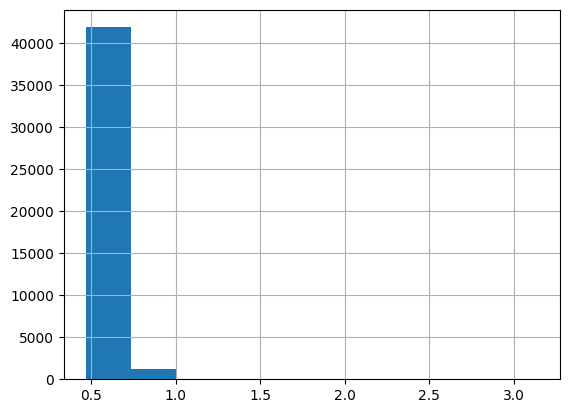

In [23]:
# время работы по кадрам
display(time_1.mean())
display(time_1.max())
display(time_1.min())
display(time_1.hist())

#### Метрика

In [24]:
# фиксируем нужные колонки для расчета метрики
cols = ['frame', 'id', 'x1', 'y1', 'w', 'h', 'conf', 'x', 'y','z'] 

In [25]:
# расчитываем метрику для базовой модели
mota, motp = motMetricsEnhancedCalculator(df_gt[cols], df_predict[cols])

In [26]:
# запишем результаты в сводную таблицу

n = 0

pivot_table.loc[n,'model'] = 'BoT-SORT'
pivot_table.loc[n,'mota'] = mota
pivot_table.loc[n,'motp'] = motp

n += 1

In [27]:
display(pivot_table) # метрика базовой модели

,model,mota,motp
0,BoT-SORT,0.923965,0.081158


### Модель ByteTrack

In [29]:
df_predict_bytetrack = pd.DataFrame() # датафрейм для сбора полученных данных

time_1 = []
line = 0
fr = 1

for idx, frame_file in tqdm(enumerate(frame_files)): # перебираем фреймы
    start_time = time()
    frame = cv2.imread(frame_file)

    if frame is not None:
        results = model.track(frame, device='cpu', persist=True, tracker="bytetrack.yaml")                    # результаты работы трекера

        if results[0].boxes.id is not None:
            for num_element in range(results[0].boxes.id.shape[0]):
            
                df_predict_bytetrack.loc[line, 'frame'] = fr                                                # номер фрейма
                df_predict_bytetrack.loc[line, 'id'] = int(results[0].boxes.id[num_element].item())         # id обекта
                df_predict_bytetrack.loc[line, 'xc'] = float(results[0].boxes.xywh[num_element][0].item())  # координаты центра
                df_predict_bytetrack.loc[line, 'yc'] = float(results[0].boxes.xywh[num_element][1].item())  # координаты центра
                df_predict_bytetrack.loc[line, 'w'] = float(results[0].boxes.xywh[num_element][2].item())   # ширина
                df_predict_bytetrack.loc[line, 'h'] = float(results[0].boxes.xywh[num_element][3].item())   # высота
                df_predict_bytetrack.loc[line, 'x1'] = float(results[0].boxes.xyxy[num_element][0].item())  # координаты углов
                df_predict_bytetrack.loc[line, 'y1'] = float(results[0].boxes.xyxy[num_element][1].item())  # координаты углов
                df_predict_bytetrack.loc[line, 'x2'] = float(results[0].boxes.xyxy[num_element][2].item())  # координаты углов
                df_predict_bytetrack.loc[line, 'y2'] = float(results[0].boxes.xyxy[num_element][3].item())  # координаты углов
                df_predict_bytetrack.loc[line, 'conf'] = float(results[0].boxes.conf[num_element].item())   # уверенности модели   
                df_predict_bytetrack.loc[line, 'class'] = int(results[0].boxes.cls[num_element].item())     # класс объекта
                df_predict_bytetrack.loc[line, 'x'] = -1                                                    # дефолтные значения для 2D
                df_predict_bytetrack.loc[line, 'y'] = -1                                                    # дефолтные значения для 2D
                df_predict_bytetrack.loc[line, 'z'] = -1                                                    # дефолтные значения для 2D
                
                stop_time = time()
                t = stop_time - start_time
                time_1.append(t)
                
                line += 1
        
        fr += 1

9000it [1:32:42,  1.62it/s]


In [30]:
# записываем результат работы трекера
try:
    df_predict_bytetrack.to_csv('df_predict_bytetrack.csv', header=True, index=False)
except Exception as ex:
    print(ex)

In [31]:
# открываем уже записаный файл
df_predict_bytetrack = pd.read_csv('df_predict_bytetrack.csv') 

In [32]:
# Для анализа переведем в Series
time_1 = pd.Series(time_1) # расчет времени

0.6109421599942838

1.6201741695404053

0.5006599426269531

<Axes: >

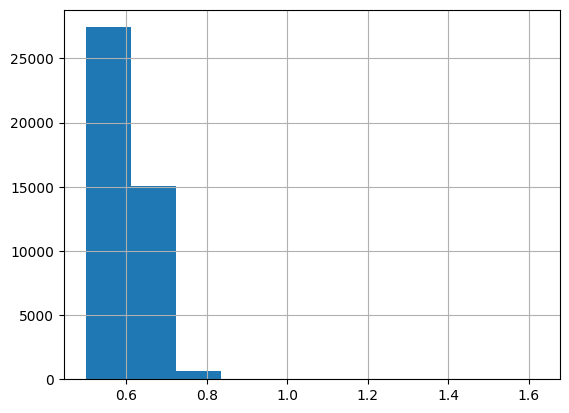

In [33]:
# время работы по кадрам
display(time_1.mean())
display(time_1.max())
display(time_1.min())
display(time_1.hist())

#### Метрика

In [34]:
# расчитываем метрику для модели c алгоритмом bytetrack
mota, motp = motMetricsEnhancedCalculator(df_gt[cols], df_predict_bytetrack[cols])

In [35]:
# запишем результаты в сводную таблицу

pivot_table.loc[n,'model'] = 'bytetrack'
pivot_table.loc[n,'mota'] = mota
pivot_table.loc[n,'motp'] = motp

n += 1

## Анализ результатов

### Сводная таблица по результатам

In [36]:
display(pivot_table) # метрики моделей

,model,mota,motp
0,BoT-SORT,0.923965,0.081158
1,bytetrack,0.9239,0.081162


### Базовая модель

<Axes: >

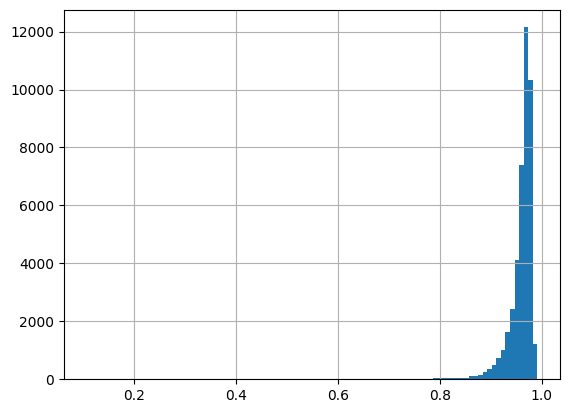

In [37]:
df_predict['conf'].hist(bins=100)

In [38]:
df_predict['conf'].min()

0.1055351793766021

In [39]:
pt_threshold = pd.DataFrame()

i = 0

for threshold in tqdm(np.arange(0.1, 0.99, 0.02).tolist()):
    df_threshold = df_predict[df_predict['conf'] >= threshold]
    
    mota_threshold, motp_threshold = motMetricsEnhancedCalculator(df_gt[cols], df_threshold[cols])
    
    pt_threshold.loc[i, 'threshold'] = threshold
    pt_threshold.loc[i, 'mota'] = mota_threshold
    pt_threshold.loc[i, 'motp'] = motp_threshold
    
    i += 1

100%|██████████| 45/45 [02:34<00:00,  3.42s/it]


<Axes: xlabel='threshold'>

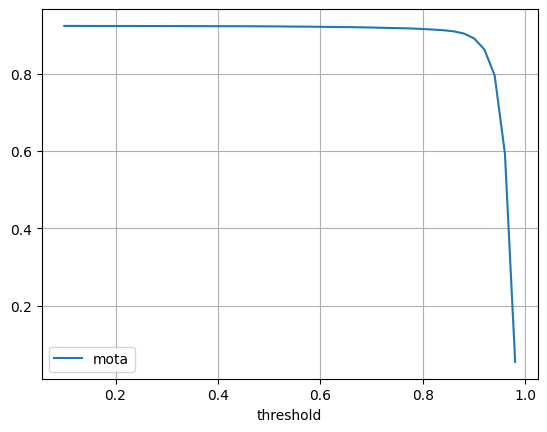

In [40]:
pt_threshold.plot(x='threshold', y='mota', grid=True)

<Axes: xlabel='threshold'>

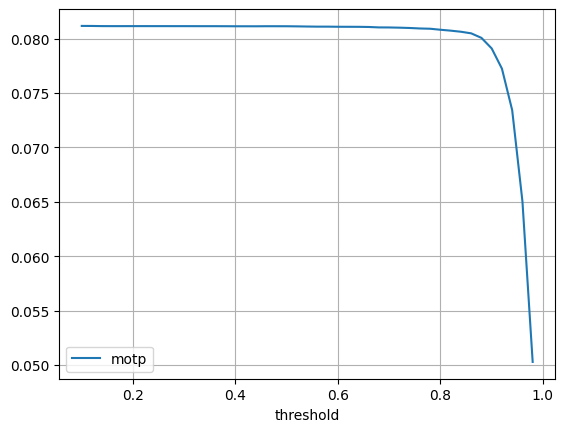

In [41]:
pt_threshold.plot(x='threshold', y='motp', grid=True)

<Axes: xlabel='mota'>

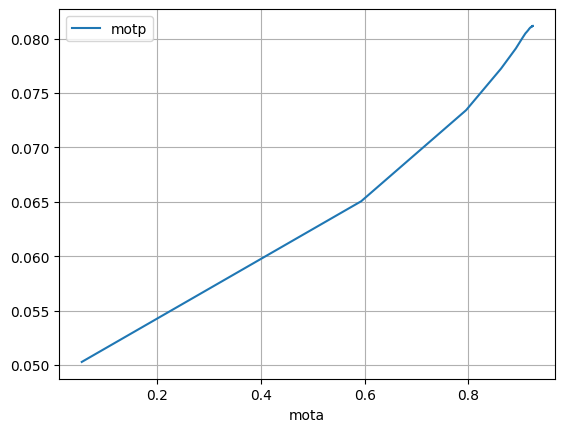

In [42]:
pt_threshold.plot(x='mota', y='motp', grid=True)

### Модель bytetrack

<Axes: >

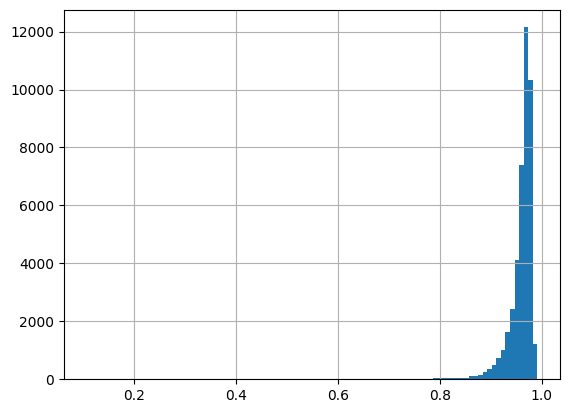

In [43]:
df_predict_bytetrack['conf'].hist(bins=100)

In [44]:
df_predict_bytetrack['conf'].min()

0.1055351793766021

In [45]:
pt_threshold_2 = pd.DataFrame()

i = 0

for threshold in tqdm(np.arange(0.1, 0.99, 0.02).tolist()):
    df_threshold = df_predict_bytetrack[df_predict_bytetrack['conf'] >= threshold]
    
    mota_threshold, motp_threshold = motMetricsEnhancedCalculator(df_gt[cols], df_threshold[cols])
    
    pt_threshold_2.loc[i, 'threshold'] = threshold
    pt_threshold_2.loc[i, 'mota'] = mota_threshold
    pt_threshold_2.loc[i, 'motp'] = motp_threshold
    
    i += 1

100%|██████████| 45/45 [02:35<00:00,  3.46s/it]


<Axes: xlabel='threshold'>

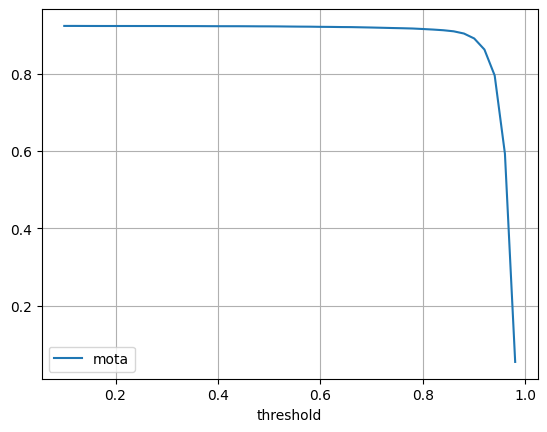

In [46]:
pt_threshold_2.plot(x='threshold', y='mota', grid=True)

<Axes: xlabel='threshold'>

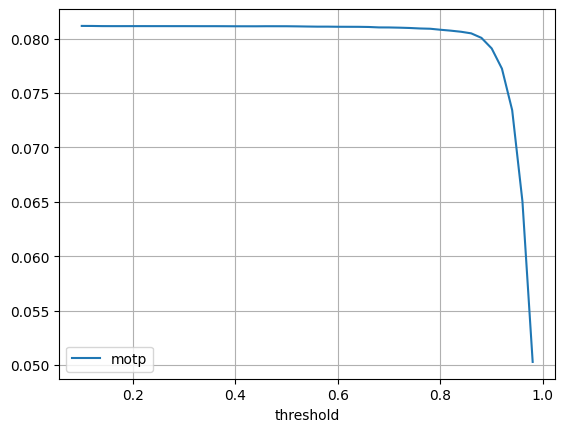

In [47]:
pt_threshold_2.plot(x='threshold', y='motp', grid=True)

<Axes: xlabel='mota'>

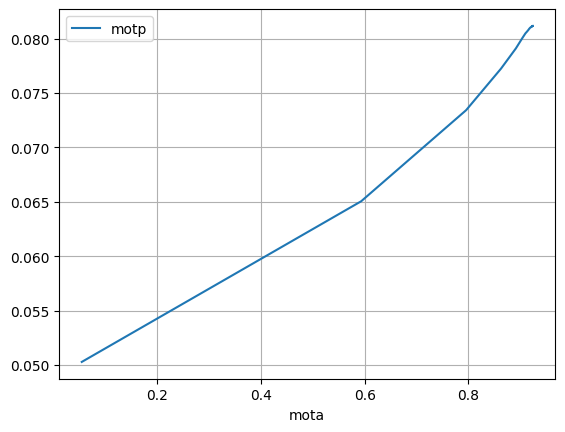

In [48]:
pt_threshold_2.plot(x='mota', y='motp', grid=True)

__Вывод:__

Были исследованы две модели: базовая и модель c использованием алгоритма ByteTrack. Наилучших результатов удалось достичь с помощью модели c ByteTrack:
* Метрика MOTA = 0.923
* Метрика MOTP = 0.086

## Визуальный анализ треков обектов

Изобразим на кадрах предсказанные моделью треки и боксы из переменной results. Полученные изображения сохраним в отдельную папку.

In [49]:
# первые 200 фреймов
results_200 = results[:201]

In [50]:
# Store the track history
track_history = defaultdict(lambda: [])

# Get the boxes and track IDs
for i, r in enumerate(results_200):
    boxes = results_200[i].boxes.xywh.cpu()
    track_ids = results_200[i].boxes.id.int().cpu().tolist()

    # Visualize the results on the frame
    annotated_frame = r.plot()

    # Plot the tracks
    for box, track_id in zip(boxes, track_ids):

        x, y, w, h = box
        track = track_history[track_id]
        track.append((float(x), float(y)))  # x, y center point
        if len(track) > 30:  # retain 90 tracks for 90 frames
            track.pop(0)

        # Draw the tracking lines
        points = np.hstack(track).astype(np.int32).reshape((-1, 1, 2))
        img = cv2.polylines(annotated_frame, [points], isClosed=False, color=(230, 230, 230), thickness=10)
        cv2.imwrite(f'Renue/results/results{i}.jpg', img)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break


cv2.destroyAllWindows()

__Вывод:__ путь объекта отслеживается корректно.

## Подбор границ трекинга объектов

In [51]:
# пересчитываем координаты центра истинных значений трекера
df_gt['x2'] = df_gt['w'] + df_gt['x1']
df_gt['y2'] = df_gt['h'] + df_gt['y1']

df_gt['xc'] = (df_gt['x1'] + df_gt['x2']) / 2
df_gt['yc'] = (df_gt['y1'] + df_gt['y2']) / 2

In [52]:
# Определяем ординату нижней границы кадра
y_max = df_gt["yc"].max()
print(y_max)

1484.5


In [53]:
# Заданим массив порогов верхней границы центра объекта для расчета метрики МОТА
min_thresholds = [0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5]

In [54]:
# колонки, которые мы будем использовать
cols = ['frame', 'id', 'xc', 'yc', 'w', 'h', 'conf', 'class']

In [55]:
#  Рассчитаем МОТА относительно каждого порога и запишем в датафрейм
min_res = pd.DataFrame(columns=['threshold', 'mota', 'motp'])

for line, thresh in enumerate(min_thresholds):
    y_thresh = y_max * thresh
    min_res.loc[line, 'threshold'] = thresh
    min_res.loc[line, 'mota'], min_res.loc[line, 'motp'] = motMetricsEnhancedCalculator(df_gt[(df_gt['yc'] > y_thresh)][cols], df_predict[(df_predict['yc'] > y_thresh)][cols])

In [56]:
# 
min_res

,threshold,mota,motp
0,0.05,0.964899,0.084258
1,0.1,0.963485,0.078933
2,0.15,0.968631,0.077725
3,0.2,0.96849,0.077164
4,0.3,0.96539,0.075489
5,0.4,0.963952,0.07426
6,0.5,0.95892,0.073845


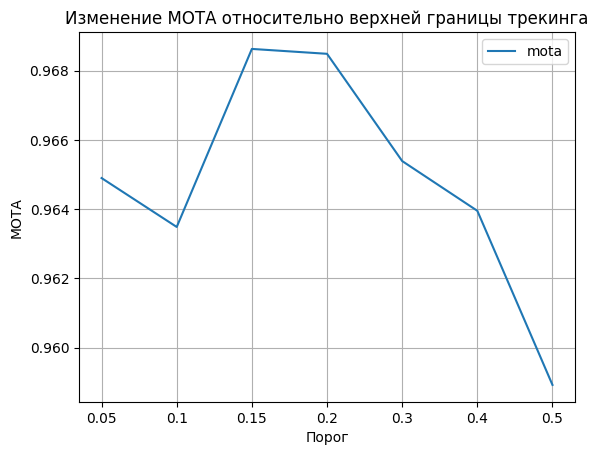

In [57]:
# 
min_res.plot(x='threshold', y='mota', grid=True)
plt.title("Изменение МОТА относительно верхней границы трекинга")
plt.xlabel('Порог')
plt.ylabel('МОТА');
plt.show()

__Вывод:__ самое высокое значение метрики МОТА получается при минимальном значении порога 0,15.

In [58]:
# 
y_min_threshold = min_res[min_res['mota'] == min_res['mota'].max()]['threshold'].min()
y_min_threshold * y_max

222.67499999999998

In [59]:
# 
max_thresholds = [1.0, 0.99, 0.98, 0.97, 0.96, 0.95, 0.9, 0.85]

In [60]:
# 
max_res = pd.DataFrame(columns=['threshold', 'mota', 'motp'])

for line, thresh in enumerate(max_thresholds):
    y_thresh = y_max * thresh
    y_min_defined = y_max * y_min_threshold
    max_res.loc[line, 'threshold'] = thresh
    max_res.loc[line, 'mota'], max_res.loc[line, 'motp'] = motMetricsEnhancedCalculator(
        df_gt[(df_gt['yc'] < y_thresh) & (df_gt['yc'] > y_min_defined)][cols], 
        df_predict[(df_predict['yc'] < y_thresh) & (df_predict['yc'] > y_min_defined)][cols])
max_res

,threshold,mota,motp
0,1.0,0.968657,0.077725
1,0.99,0.972905,0.077688
2,0.98,0.980528,0.076124
3,0.97,0.981865,0.074209
4,0.96,0.981673,0.073021
5,0.95,0.981608,0.072355
6,0.9,0.98038,0.072357
7,0.85,0.980282,0.073692


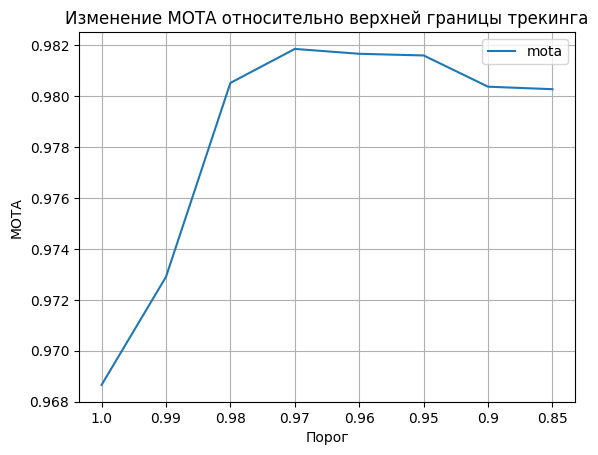

In [61]:
# 
max_res.plot(x='threshold', y='mota', grid=True)
plt.title("Изменение МОТА относительно верхней границы трекинга")
plt.xlabel('Порог')
plt.ylabel('МОТА');
plt.show()

__Вывод:__ Самое высокое значение метрики МОТА получается при значении порога 0,97.

In [62]:
# 
y_max_threshold = max_res[max_res['mota'] == max_res['mota'].max()]['threshold'].max()
y_max_threshold * y_max

1439.965

__Вывод:__

При трекинге объектов на границах кадра возникают сложности. Модели, используемые для детекции и трекинга объектов, склонны к ошибкам в случае, когда объект частично находится за границей изображения. Для увеличения точности трекинга можно использовать границы начала трекинга и передачи данных на манипулятор. В нашем случае оптимальным значением ординаты центра объекта для начала трекинга является у=223 (15% от максимального значения ординаты), а для прекращения трекинга и отправки координат на манипулятор - у=1440 (97% от максимального значения ординаты).

## Приложение 1 (Дополнительная демонстрация работы модели)

Дополнительно к работе была создана функция track_model, которая обеспечивает покадровую обработку данных и передачу информации об истории трекировки и выдачи координат расположения мусора для робата, который его сортирует. Функция позволяет также выполнять анализ треков элементов, которые двигаются не прямолинейно или со смещением вправо/влево.

### Создание функций

Создание функции визуализации трека.

In [63]:
def track_visualization(df, x_lim_max, y_lim_max, xc_pred, img):
    '''
    Функция визуализации траектории.
    
    На входе функция принимает:
    1. df - Датафрейм с информацией о треке;
    2. x_lim_max и y_lim_max - максимальные значения осей x и y (должны соответствовать размерам анализируемого изображения)
    3. xc_pred - предсказанная координата х, которая передаётся робату для забора мусора
    4. img - анализируемое изображение.

    Функция обеспечивает вывод на экран анализируемого изображения с разметкой 
    осей координат, нанесением синих точек траектории и вертикальной линии на значении 
    предсказанной координаты х для робота.
    '''

    # Создаем график
    plt.figure()
    plt.plot(df['xc'], df['yc'], 'bo')  # График точек синими кружками
    plt.axvline(x=xc_pred, color='y')  # Вертикальная жёлтая линия в x=3
        
    plt.xlim (0, x_lim_max)
    plt.ylim (0, y_lim_max)
    
    plt.imshow(img)
    
    plt.gca().invert_yaxis()  # Инвертируем ось y

    plt.show()

Создание функции обработки изображения.

In [64]:
def track_model(*, 
                model_detect, # Модель детекции
                img_path, # Путь к изображению, которое анализаруем
                show_analys: bool=False, # Если необходимо выводить визуализацию изображения и информацию о треке 
                                         # (в соответствии с кодом выводятся только изображения со сложной траекторией)
                history: pd.DataFrame=None, # Таблица с историей трекинга
                num_of_frame: int=26, # Количество кадров, которое хранится в истории и анализируется моделью (от 3 и более)
                threshold: float=0.1, # Порог для отсесения верхней и нижней части кадра (от 0 до 0,5)
                x_lim_max: int=2048, # ширина изображения
                y_lim_max: int=1486, # Высота изображения
                min_point_track: int=5 # Минимальное количество точек трека для выполнения моделью анализа трека
               ):
    
    
    '''
    Модель обработки изображений и выдачи информации для робота.
    
    Функция принимает на входе:
    1. model_detect - Модель детекции мусора;
    2. img_path - Путь к изображению, которое анализаруем;
    3. show_analys - параметр, определяющий необходи мо ли выводить на экран изображения треков для их анализа
                     (в соответствии с кодом выводятся только изображения со сложной траекторией);
    4. history - Таблица с историей трекинга (изначально подаётся пустой датафрейм)
    5. num_of_frame - Количество кадров, которое хранится в истории и анализируется моделью (от 3 и более);
    6. threshold - Порог для отсесения верхней и нижней части кадра (от 0 до 0,5);
    7. x_lim_max - Ширина изображения;
    8. y_lim_max - Высота изображения;
    9. min_point_track: int=5, # Минимальное количество точек трека для выполнения моделью анализа формы трека
    
    На выходе функция выдаёт:
    1. Датафрейм history с информацией об истории трекировки за последние num_of_frame кадров;
    2. Датафрейм df_coordinate с информацией о координатах мусора для передачи в систему робота.
    3. При значении show_analys = True функция выводит на экран обрабатываемое изображение с осями координат, точками 
    разметки движения элемента (мусора) и жёлтой вертикальной линией предсказанной координатой x для робота.
    
    '''
    # Настройка констант под алгоритм, вычисление производных констант и инициализация переменных
    num_of_frame += 1

    y_min = y_lim_max * threshold
    y_max = y_lim_max - y_min
    
    frame = cv2.imread(frame_file)
    
    frame_name = (img_path).split("\\")[-1][:-4]
    
    df_coordinate = pd.DataFrame()
    
    # Проверка, что изображение на пустое
    if frame is not None:
        results = model.track(frame, persist=True, device='cpu')

        # Проверка, что моель нашла на изображении какие-либо объекты
        if results[0].boxes.id is not None:
            
            line = 0
            
            df_predict = pd.DataFrame()
            
            # Данные по каждому объекту вносятся в датафрейм df_predict
            for num_element in range(results[0].boxes.id.shape[0]):
            
                df_predict.loc[line, 'frame'] = frame_name
                df_predict.loc[line, 'id'] = int(results[0].boxes.id[num_element].item())
                df_predict.loc[line, 'xc'] = float(results[0].boxes.xywh[num_element][0].item())
                df_predict.loc[line, 'yc'] = float(results[0].boxes.xywh[num_element][1].item())
                df_predict.loc[line, 'y1'] = float(results[0].boxes.xyxy[num_element][1].item())
                df_predict.loc[line, 'y2'] = float(results[0].boxes.xyxy[num_element][3].item())
                df_predict.loc[line, 'class'] = int(results[0].boxes.cls[num_element].item())
            
                line += 1
            
            # Полученная для изображения информация вносится в датафрейм history. При этом старые изображения удаляются 
            # ( хранится не более num_of_frame кадров)
            if history.empty == True: 
                history = pd.concat([history, df_predict])
            elif history['frame'].nunique() < num_of_frame:
                history = pd.concat([history, df_predict]).reset_index(drop=True)
            else:
                old_frame = history.reset_index()['frame'][0]
                history = pd.concat([history[history['frame'] != old_frame], df_predict]).reset_index(drop=True)
            
            df_coordinate = pd.DataFrame()
            
            line = 0
            
            # Для каждого объекта из истории создаётся датафрейм id для оценки трека 
            # и выдачи координат в датафрейм df_coordinate
            for id in history['id'].unique():
        
                df = history[(history['id'] == id) & (history['y1'] > y_min) & (history['y2'] < y_max) ]
                df_last_line = df.tail(1).reset_index()                
                
                if df['id'].count() >= min_point_track:
                    if df['xc'].std() < 20:
                        df_coordinate.loc[line, 'frame'] = df_last_line.loc[0, 'frame']
                        df_coordinate.loc[line, 'id'] = id
                        df_coordinate.loc[line, 'yc'] = df_last_line.loc[0, 'yc']
                        df_coordinate.loc[line, 'class'] = df_last_line.loc[0, 'class']
                        df_coordinate.loc[line, 'xc_pred'] = df['xc'].tail(3).mean()
                        
                        line +=1

                    else:
                        X = df[['xc']].values
                        y = df['yc'].values
                        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
                        w = np.linalg.inv(X.T @ X) @ X.T @ y
                        k = w[1]
                        if -40 < k < 40 and df.tail(5)['xc'].std() < 15:
                            df_coordinate.loc[line, 'xc_pred'] = df['xc'].tail(4).mean()
                            df_coordinate.loc[line, 'frame'] = df_last_line.loc[0, 'frame']
                            df_coordinate.loc[line, 'id'] = id
                            df_coordinate.loc[line, 'yc'] = df_last_line.loc[0, 'yc']
                            df_coordinate.loc[line, 'class'] = df_last_line.loc[0, 'class']
                            line +=1
                        elif -40 < k < 40:
                            df_coordinate.loc[line, 'xc_pred'] = df_last_line.loc[0, 'xc'] # (y_lim_max - w[0]) /  w[1] + delta_y 
                            df_coordinate.loc[line, 'frame'] = df_last_line.loc[0, 'frame']
                            df_coordinate.loc[line, 'id'] = id
                            df_coordinate.loc[line, 'yc'] = df_last_line.loc[0, 'yc']
                            df_coordinate.loc[line, 'class'] = df_last_line.loc[0, 'class']
                        else:
                            df_coordinate.loc[line, 'xc_pred'] = df['xc'].mean()
                            df_coordinate.loc[line, 'frame'] = df_last_line.loc[0, 'frame']
                            df_coordinate.loc[line, 'id'] = id
                            df_coordinate.loc[line, 'yc'] = df_last_line.loc[0, 'yc']
                            df_coordinate.loc[line, 'class'] = df_last_line.loc[0, 'class']
                                                        
                            line +=1

                    # Алгоритм для вывода изображений с непрямолинейными треками
                    if show_analys == True:
                        xc_std = df['xc'].std()
                        if xc_std >= 20:
                            print('-' * 40)
                            print(f'Имя файла трека: {frame_name}')
                            print(f'Id предмета: {id}')
                            print(f'Стандартное отклонение трека: {xc_std}')
                            print(f'Коэффициент наклона средней линии трека: {k}')
                            track_visualization(df, x_lim_max, y_lim_max, df_coordinate.tail(1).reset_index().loc[0, 'xc_pred'], frame)
            
    return history, df_coordinate

### Код для демонстрации работы функции.

In [67]:
# Инициализация модели детекции
model_detection = YOLO(model_path) # Load a custom trained model

In [68]:
# Создание списка со ссылками на изображения
frame_files = [os.path.join(path_images, f) for f in sorted(os.listdir(path_images)) if os.path.isfile(os.path.join(path_images, f))]

In [1]:
# # Запуск работы модели на тестовых изображениях
# history = pd.DataFrame()
# сoordinates = pd.DataFrame()
#
# for frame_file in tqdm(frame_files[:]):
#
#     history, сoordinates = track_model(model_detect=model_detection,
#                                        img_path=frame_file,
#                                        num_of_frame=26,
#                                        history=history,
#                                        show_analys=True
#                                       )

## Общий вывод

В ходе работы были проанализированы предоставленные заказчиком данные, построены две модели трекинга (BoT-SORT и ByteTrack). Наилучших результатов удалось достичь с помощью модели c ByteTrack:
* Метрика MOTA = 0.923
* Метрика MOTP = 0.086
Скорость обработки одного кадра - менее 100 мс.

Были подобраны оптимальные границы для трекинга объектов: оптимальным значением ординаты центра объекта для начала трекинга является у=223 (15% от максимального значения ординаты), а для прекращения трекинга и отправки координат на манипулятор - у=1440 (97% от максимального значения ординаты).

В проекте также предусмотрена возможность записи кадров с отрисовкой боксов и треков.

__Рекомендации бизнесу__

На основании проведенного анализа для улучшения качества трекинга объектов можно рекомендовать следующее:
* Предусмотреть прессование объектов для уменьшения вроятности катания их поперек ленты конвейера.
* Распределять объекты по ленте более равномерно, чтобы они не располагались слишком близко друг к другу.
* Стабилизировать ленту конвейера для более плавного перемещения объектов по ней.
* Разместить камеру как можно ближе к манипулятору, чтобы исключить передачу неверных координат в случае, если объект выезжает за пределы кадра при продолжающемся движении поперек ленты.
* Повысить яркость освещения в районе камеры (например, используя круговую лампу).
Обеспечение данных рекомендаций повысит качество видео и работы детектора и трекера, соотвественно.

__Улучшение проекта и дальнейшее исследование__

Возможны следующие пути усовершенствования проекта и модели трекинга:
* Подбор гиперпараметров для трекера.
* Использование других моделей детекции и трекинга (FairMOT, DEVA, CSRT).
* Сегментация изображения объектов.
* Написание скрипта.